## Module 3 Project
* Student name: Kyle Aguilar
* Student pace: full time online
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL:

# Observe

I downloaded the .csv file from Kaggle.com [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure). This is a survey conducted every three years by the Philippine Statistics Authority as the main source of data on household income information. There is a wide disparity between the upper and lower income households in the Philippines, and this data is used to measure the Gini coefficient both at the national and regional level. 

For the purposes of this exercise, I am first changing my target column of Total Household Income from continuous values into 0-1, with 1 indicating that a household earns above the median, and 0 indicating that a household makes earns below the median. 

In [ ]:
# Importing libraries necessary for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import math

# Importing dataset, viewing first five rows
df=pd.read_csv('Family Income and Expenditure.csv')
df.head()

In [ ]:
# Changing linear target column into a binary classification problem
income_median = df['Total Household Income'].median()
df.loc[df['Total Household Income'] < income_median , 'Total Household Income'] = 0
df.loc[df['Total Household Income'] >= income_median , 'Total Household Income'] = 1
df['Total Household Income'].value_counts()

# Scrub

In [3]:
# Identifying columns with missing values that can be dropped
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

As these features are objects, I will already proceed with dropping these columns from the main dataframe.

In [4]:
# Dropping columns from dataframe
df.drop(columns=['Household Head Occupation', 'Household Head Class of Worker'], axis=0, inplace=True)

In [5]:
# Creating dataframe of remaining object columns so I can explore which ones will be kept
target = df[['Total Household Income']]
df_objects = df.select_dtypes(include=['object'])
df_objects['Total Household Income'] = target
df_objects.head()

,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply,Total Household Income
0,CAR,Wage/Salaries,Female,Single,Teacher Training and Education Sciences Programs,With Job/Business,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1
1,CAR,Wage/Salaries,Male,Married,Transport Services Programs,With Job/Business,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1
2,CAR,Wage/Salaries,Male,Married,Grade 3,With Job/Business,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0
3,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system",0
4,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1


In [6]:
# printing value counts for object features
for col in df_objects.columns[:-1]:
    print(f'Value Counts for Object Column {col}')
    print(df[col].value_counts())
    print('------------------------------')

Value Counts for Object Column Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64
------------------------------
Value Counts for Object Column Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64
------------------------------
Value Counts for Object Column Household Head Sex
Male      32483
Female     9061
Name: Hous

Based on this first pass I will leave out the Region and Level of Education columns as they contain a great variety of information that will add too many one-hot columns, were I to create dummy variables for each value. However, a number of these could potentially be simplified and turned into 1-0 columns without creating additional columns (ex: Main Source of Water Supply could be turned into 1-0 where 1 indicates all homes with own-use water supply and 0 indicates all other values). 

In [7]:
# Dropping columns both from main dataframe and object dataframe
df.drop(columns=['Region', 'Household Head Highest Grade Completed'], axis=0, inplace=True)
df_objects.drop(columns=['Region', 'Household Head Highest Grade Completed'], axis=0, inplace=True)

Rather than adding additional columns to our dataset using all of the unique values in my object categories, I would rather view each of them and how they may or may not impact our target, and either drop them or simplify the variable to a single binary indicator column.

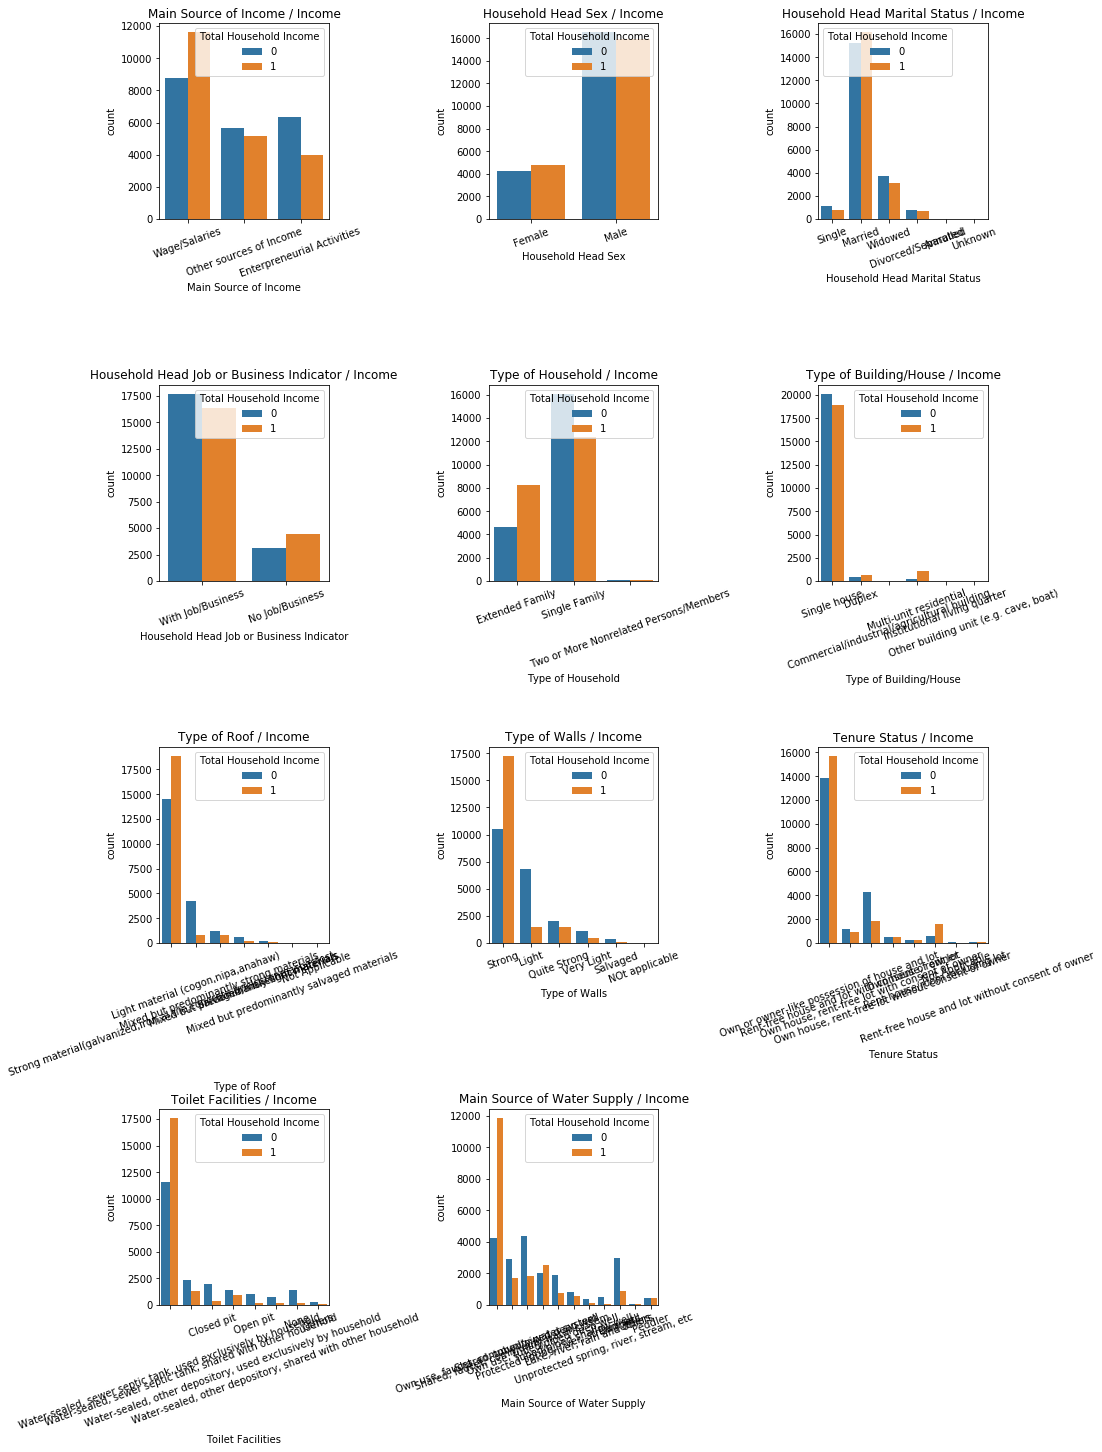

In [14]:
f = plt.figure(figsize=(15,20))
for i, col in enumerate(df_objects.columns[:-1]):
    f.add_subplot(4, 3, i+1)
    sns.countplot(x=col,hue='Total Household Income',data=df_objects)
    plt.xticks(rotation=20)
    plt.title(f'{col} / Income')
f.tight_layout(pad=.1)
plt.show()

In [18]:
# Dropping columns where there is no clear probability that the value of a feature is a strong indication of household income
df.drop(columns=['Household Head Sex', 'Household Head Job or Business Indicator', 'Tenure Status', 'Household Head Marital Status', 'Type of Building/House'], axis=0, inplace=True)

# Changing other remaining object columns in main df to one-hot where there is a visible correlation between the variable (or a value of the variable) and household income
df.loc[df['Main Source of Income'] != 'Wage/Salaries' , 'Main Source of Income'] = 0
df.loc[df['Main Source of Income'] == 'Wage/Salaries' , 'Main Source of Income'] = 1

df.loc[df['Type of Household'] != 'Single Family' , 'Type of Household'] = 0
df.loc[df['Type of Household'] == 'Single Family' , 'Type of Household'] = 1
df.rename(columns = {'Type of Household':'Single Family'}, inplace = True) 

df.loc[df['Type of Roof'] != 'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)' , 'Type of Roof'] = 0
df.loc[df['Type of Roof'] == 'Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)' , 'Type of Roof'] = 1
df.rename(columns = {'Type of Roof':'Strong Roof Materials'}, inplace = True) 

df.loc[df['Type of Walls'] != 'Strong' , 'Type of Walls'] = 0
df.loc[df['Type of Walls'] == 'Strong' , 'Type of Walls'] = 1
df.rename(columns = {'Type of Walls':'Strong Wall Materials'}, inplace = True) 

df.loc[df['Toilet Facilities'] != 'Water-sealed, sewer septic tank, used exclusively by household' , 'Toilet Facilities'] = 0
df.loc[df['Toilet Facilities'] == 'Water-sealed, sewer septic tank, used exclusively by household' , 'Toilet Facilities'] = 1
df.rename(columns = {'Toilet Facilities':'Exclusive Use Septic Tank'}, inplace = True) 

df.loc[df['Main Source of Water Supply'] != 'Own use, faucet, community water system' , 'Main Source of Water Supply'] = 0
df.loc[df['Main Source of Water Supply'] == 'Own use, faucet, community water system' , 'Main Source of Water Supply'] = 1
df.rename(columns = {'Main Source of Water Supply':'Exclusive Use Faucet'}, inplace = True) 

In [30]:
# Checking to ensure there are no duplicate rows as there are no unique keys
df[df.duplicated()]

,Total Household Income,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle


# Explore

In [23]:
abs(df.corr()) > 0.75

,Total Household Income,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
Total Household Income,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Food Expenditure,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Main Source of Income,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Agricultural Household indicator,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bread and Cereals Expenditure,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Rice Expenditure,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Meat Expenditure,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Fish and marine products Expenditure,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Fruit Expenditure,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Vegetables Expenditure,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


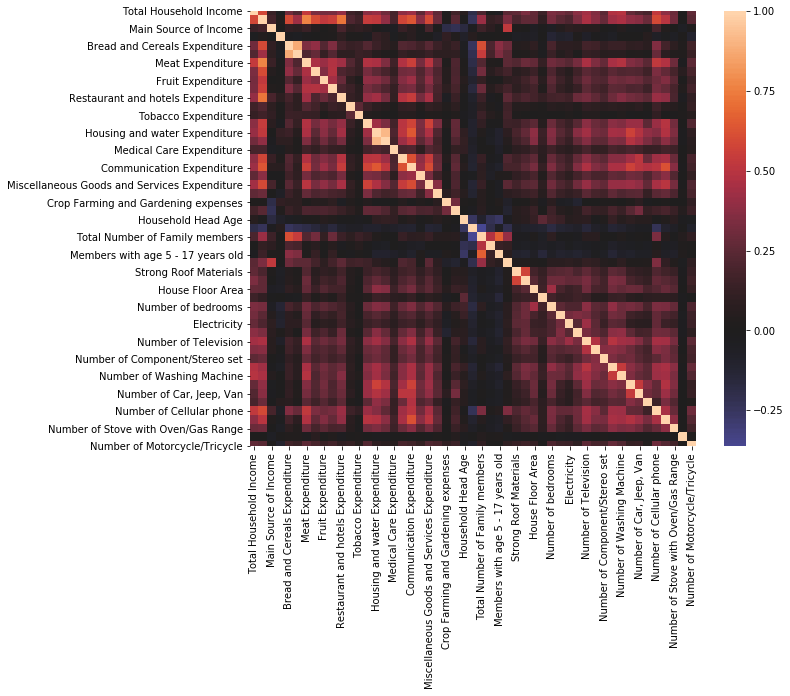

In [22]:
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), center=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002078A8D54E0>,
      dtype=object)

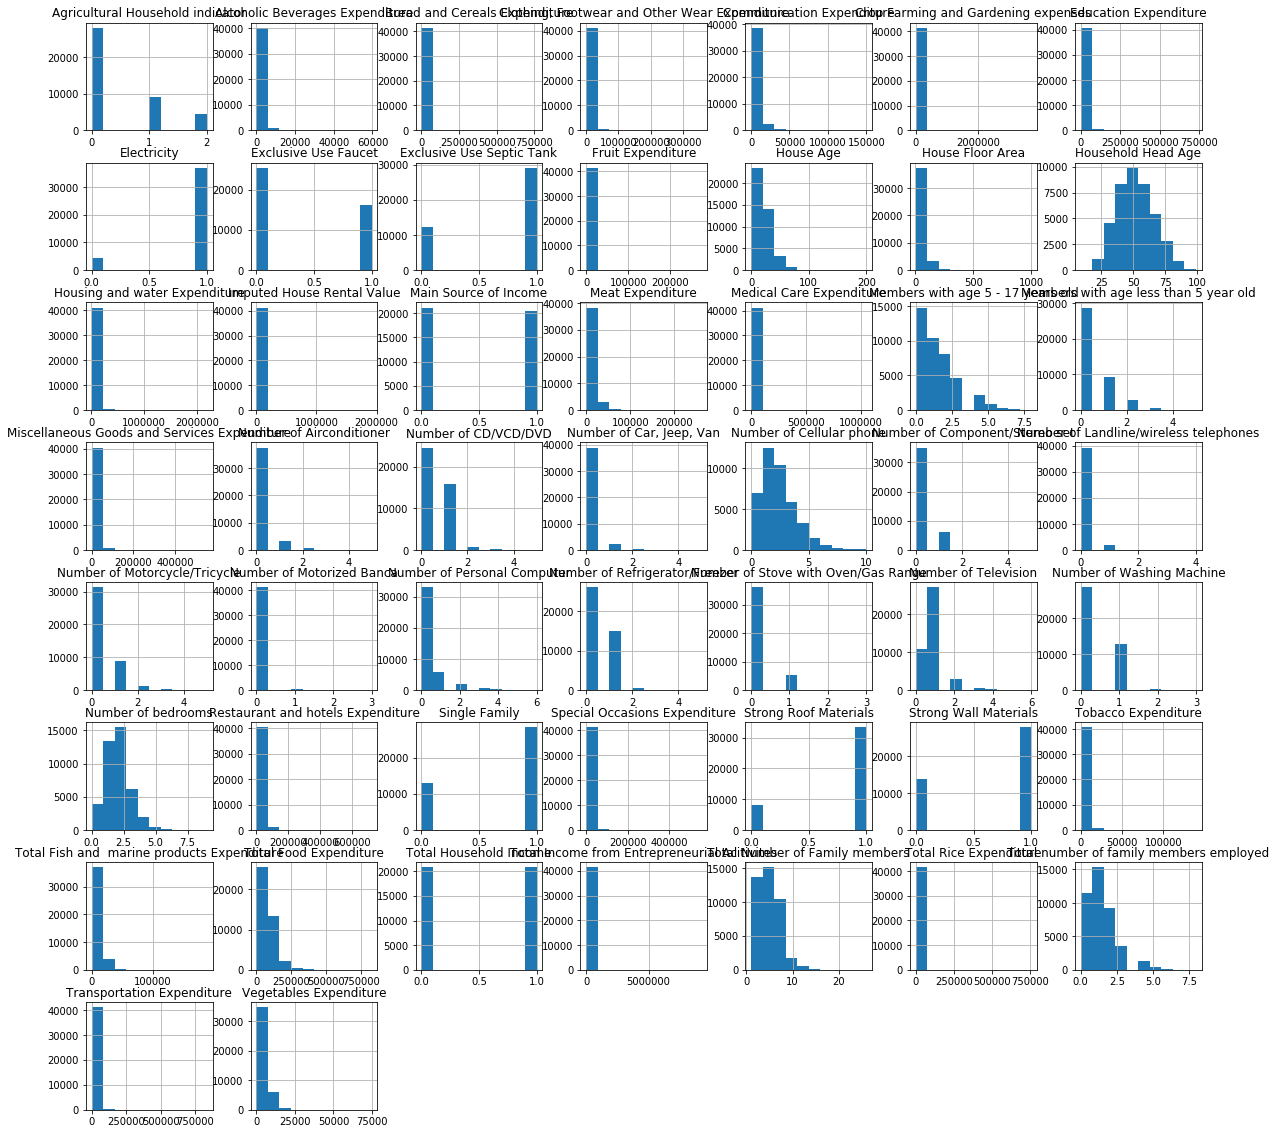

In [33]:
df.hist(figsize=(20, 20))

In [38]:
vars = ['Alcoholic Beverages Expenditure', 'Bread and Cereals Expenditure', 'Communication Expenditure',\
        'Clothing, Footwear and Other Wear Expenditure', 'Education Expenditure',\
        'Crop Farming and Gardening expenses', 'Fruit Expenditure', 'Housing and water Expenditure',\
        'Imputed House Rental Value', 'Medical Care Expenditure', 'Miscellaneous Goods and Services Expenditure',\
        'Number of Motorized Banca', 'Special Occasions Expenditure', 'Total Income from Entrepreneurial Acitivites',\
        'Total Rice Expenditure']
for var in vars:
    print(f'Value Counts for Continuous Variable Column {var}')
    print(df[var].value_counts())
    print('------------------------------')

Value Counts for Continuous Variable Column Alcoholic Beverages Expenditure
0        16830
240        345
300        309
540        300
480        299
         ...  
10571        1
2351         1
12584        1
2586         1
7948         1
Name: Alcoholic Beverages Expenditure, Length: 4084, dtype: int64
------------------------------
Value Counts for Continuous Variable Column Bread and Cereals Expenditure
0        15
20734     9
21930     8
8758      8
15520     8
         ..
32703     1
34752     1
36801     1
40899     1
16362     1
Name: Bread and Cereals Expenditure, Length: 26082, dtype: int64
------------------------------
Value Counts for Continuous Variable Column Communication Expenditure
0        4204
360       436
720       391
1200      384
600       356
         ... 
23682       1
15474       1
19680       1
31974       1
7188        1
Name: Communication Expenditure, Length: 3826, dtype: int64
------------------------------
Value Counts for Continuous Variable Column C

In [39]:
df.drop(columns=['Number of Motorized Banca', 'Crop Farming and Gardening expenses'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 49 columns):
Total Household Income                           41544 non-null int64
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null int64
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  41544 non-null int64
Tobacco Expenditure                              41

In [28]:
df.describe()

,Total Household Income,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,0.500000,85099.158194,0.490757,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,0.500006,51637.947682,0.499921,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,0.000000,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,51017.250000,0.000000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,72985.500000,0.000000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,105635.500000,1.000000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,827565.000000,1.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


# Model

In [41]:
# creating 70/30 train/test split
from sklearn.model_selection import train_test_split
y = df[['Total Household Income']]
X = df.drop(['Total Household Income'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

29080 12464 29080 12464


## Model 1.1 - Logistic Regression

In [48]:
# importing library for initial model
import statsmodels.api as sm

# Create intercept term
X_train_Logit = sm.add_constant(X_train)

# Fit model
logit_model = sm.Logit(y_train, X_train_Logit)
result = logit_model.fit()

# Generating summary table
result.summary()

# Pipeline
# Standard Scaling
# Regularization

# Models:
# XGBoost
# Decision Tree Classifier
# Random Forest


Optimization terminated successfully.
         Current function value: 0.216170
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     Total Household Income   No. Observations:                29080
Model:                              Logit   Df Residuals:                    29031
Method:                               MLE   Df Model:                           48
Date:                    Tue, 14 Apr 2020   Pseudo R-squ.:                  0.6881
Time:                            09:16:25   Log-Likelihood:                -6286.2
converged:                           True   LL-Null:                       -20157.
Covariance Type:                nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -9.2029      0.203    -45.325      0.000      -9.601      -8.805
Total Food Expenditure                         3.643e-05   3.81e-06      9.556      0.000     2.9e-05    4.39e-05
Main Source of Income                             0.8717      0.065     13.503      0.000       0.745       0.998
Agricultural Household indicator                 -0.2148      0.037     -5.740      0.000      -0.288      -0.141
Bread and Cereals Expenditure                 -1.717e-05   5.69e-06     -3.016      0.003   -2.83e-05   -6.01e-06
Total Rice Expenditure                        -6.408e-06      4e-06     -1.601      0.109   -1.43e-05    1.44e-06
Meat Expenditure                               2.373e-05   6.56e-06      3.620      0.000    1.09e-05    3.66e-05
Total Fish and  marine products Expenditure   -9.054e-06   5.82e-06     -1.557      0.120   -2.05e-05    2.35e-06
Fruit Expenditure                              4.577e-06   1.64e-05      0.279      0.781   -2.76e-05    3.68e-05
Vegetables Expenditure                        -1.518e-05    1.1e-05     -1.383      0.167   -3.67e-05    6.33e-06
Restaurant and hotels Expenditure             -1.296e-06   4.31e-06     -0.300      0.764   -9.75e-06    7.16e-06
Alcoholic Beverages Expenditure                5.662e-05   1.33e-05      4.244      0.000    3.05e-05    8.28e-05
Tobacco Expenditure                             2.53e-05    6.5e-06      3.890      0.000    1.26e-05     3.8e-05
Clothing, Footwear and Other Wear Expenditure  9.786e-05   9.46e-06     10.349      0.000    7.93e-05       0.000
Housing and water Expenditure                  4.718e-05   3.03e-06     15.562      0.000    4.12e-05    5.31e-05
Imputed House Rental Value                     2.016e-05   3.72e-06      5.417      0.000    1.29e-05    2.75e-05
Medical Care Expenditure                        3.75e-05   2.52e-06     14.872      0.000    3.26e-05    4.24e-05
Transportation Expenditure                     5.165e-05   3.96e-06     13.052      0.000    4.39e-05    5.94e-05
Communication Expenditure                         0.0001   1.41e-05      7.918      0.000    8.38e-05       0.000
Education Expenditure                          3.571e-05   3.09e-06     11.566      0.000    2.97e-05    4.18e-05
Miscellaneous Goods and Services Expenditure   9.866e-05   5.53e-06     17.856      0.000    8.78e-05       0.000
Special Occasions Expenditure                  5.024e-05   3.98e-06     12.615      0.000    4.24e-05     5.8e-05
Total Income from Entrepreneurial Acitivites   2.176e-05   6.88e-07     31.632      0.000    2.04e-05    2.31e-05
Household Head Age                                0.0119      0.002      5.728      0.000       0.008       0.016
Single Family                                    -0.0945      0.057     -1.664      0.096      -0.206       0.017
Total Number 

### Model 1.2: Logit Model with Feature Selection

In [54]:
logit_vars_2 = X.columns.tolist()
high_p = ['Total Rice Expenditure', 'Total Fish and marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Single Family', 'Total Number of Family members', 'Members with age less than 5 year old', 'Strong Roof Materials', 'Strong Wall Materials', 'House Age', 'Exclusive Use Septic Tank', 'Electricity', ' Number of Television', 'Number of CD/VCD/DCD', 'Number of Component/Stereo set', 'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Car, Jeep, Van', 'Number of Landline/wireless telephones', 'Number of Stove with Oven/Gas Range', 'Number of Motorcycle/Tricycle']
for var in high_p:
    logit_vars_2.remove(var)
print(logit_vars_2)

ValueError: list.remove(x): x not in list

In [55]:
print(logit_vars_2)

['const', 'Total Food Expenditure', 'Main Source of Income', 'Agricultural Household indicator', 'Bread and Cereals Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Imputed House Rental Value', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Total Income from Entrepreneurial Acitivites', 'Household Head Age', 'Single Family', 'Total Number of Family members', 'Members with age less than 5 year old', 'Members with age 5 - 17 years old', 'Total number of family members employed', 'Strong Roof Materials', 'Strong Wall Materials', 'House Floor Area', 'House Age', 'Number of bedrooms', 'Exclusiv

In [ ]:
# importing libraries to preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression